<a href="https://colab.research.google.com/github/evennybo/AlgoTrade/blob/main/TradeStrat_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

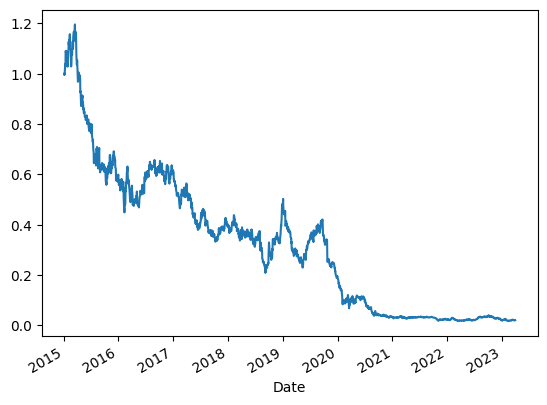

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
# Download the stock price data from yfinance
df = yf.download("TSLA", start="2015-01-01", end="2023-03-31")


# Compute the 20-day and 50-day moving averages
df['ma20'] = df['Close'].rolling(window=20).mean()
df['ma50'] = df['Close'].rolling(window=50).mean()

# Compute the 20-day standard deviation
df['stddev'] = df['Close'].rolling(window=20).std()

# Compute the Bollinger Bands
df['upper_band'] = df['ma20'] + 2 * df['stddev']
df['lower_band'] = df['ma20'] - 2 * df['stddev']

# Compute the MACD (12-day and 26-day exponential moving averages)
df['ema12'] = df['Close'].ewm(span=12).mean()
df['ema26'] = df['Close'].ewm(span=26).mean()
df['macd'] = df['ema12'] - df['ema26']

# Compute the 9-day EMA of the MACD
df['signal'] = df['macd'].ewm(span=9).mean()

# Compute the RSI (14-day relative strength index)
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))

# Implement the trading strategy
df['position'] = np.where(df['Close'] > df['upper_band'], -1, 0)
df['position'] = np.where(df['Close'] < df['lower_band'], 1, df['position'])
df['position'] = np.where(df['macd'] > df['signal'], 1, df['position'])
df['position'] = np.where(df['macd'] < df['signal'], -1, df['position'])
df['position'] = np.where(df['rsi'] > 70, -1, df['position'])
df['position'] = np.where(df['rsi'] < 30, 1, df['position'])
df['position'] = df['position'].ffill().fillna(0)

# Compute the daily returns
df['returns'] = df['Close'].pct_change() * df['position'].shift(1)

# Compute the cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Plot the cumulative returns
df['cumulative_returns'].plot()

In [ ]:
!sudo apt-get install python3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!python3 -m pip install ta-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached TA-Lib-0.4.26.tar.gz (272 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for ta-lib
Failed to build ta-lib
ERROR: Could not build wheels for ta-lib, which is required to install pyproject.toml-based projects


In [ ]:
!sudo pip3 install ta-lib --no-binary :all:

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached TA-Lib-0.4.26.tar.gz (272 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
ERROR: Operation cancelled by user
  Installing backend dependencies ... Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main.py", line 70, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.9/dist-pa

In [ ]:
import pandas as pd
import numpy as np
import talib

# Define function to calculate the moving average
def moving_average(data, window):
    return talib.SMA(data, window)

# Define function to calculate the RSI
def relative_strength_index(data, window):
    return talib.RSI(data, window)

# Define function to calculate the Bollinger Bands
def bollinger_bands(data, window):
    sma = moving_average(data, window)
    std = np.std(data[-window:])
    upper_band = sma + 2 * std
    lower_band = sma - 2 * std
    return upper_band, lower_band

# Load historical stock data
df = yf.download("TSLA", start="2015-01-01", end="2023-03-31")


# Calculate the 14-day RSI
df['rsi'] = relative_strength_index(df['Close'], 14)

# Calculate the 20-day moving average and the upper and lower Bollinger Bands
df['sma20'] = moving_average(df['Close'], 20)
df['upper_band'], df['lower_band'] = bollinger_bands(df['Close'], 20)

# Define function to execute trading strategy
def trading_strategy(df):
    if df['Close'][-1] > df['sma20'][-1] and df['rsi'][-1] > 50:
        return 'Buy'
    elif df['Close'][-1] < df['lower_band'][-1]:
        return 'Buy'
    elif df['Close'][-1] < df['sma20'][-1] and df['rsi'][-1] < 50:
        return 'Sell'
    elif df['Close'][-1] > df['upper_band'][-1]:
        return 'Sell'
    else:
        return 'Hold'

# Execute trading strategy on the latest data
print(trading_strategy(df.tail(1)))





In [ ]:
'''
This code downloads the historical stock data for Tesla from Yahoo Finance, computes the simple moving average (SMA) over a window size of 20 days,
generates buy and sell signals based on the SMA crossover, computes the daily returns based on the trading signals, and computes the cumulative returns over time.
The final output is the cumulative returns of the trading strategy over the entire time period.
Keep in mind that this is just a simple example and should not be used for actual trading without proper testing and validation.
'''
import yfinance as yf

# Define the stock symbol and moving average window size
stock_symbol = 'TSLA'
window_size = 20

# Download the historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start='2020-01-01')

# Compute the simple moving average (SMA) over the window size
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

# Initialize the trading signals
stock_data['Signal'] = 0.0

# Generate the buy and sell signals based on the SMA crossover
for i in range(window_size, len(stock_data)):
    if stock_data['SMA'][i] > stock_data['SMA'][i - 1]:
        stock_data['Signal'][i] = 1.0
    elif stock_data['SMA'][i] < stock_data['SMA'][i - 1]:
        stock_data['Signal'][i] = -1.0

# Compute the daily returns based on the trading signals
stock_data['Returns'] = stock_data['Close'].pct_change() * stock_data['Signal'].shift(1)

# Compute the cumulative returns over time
stock_data['Cumulative Returns'] = (1 + stock_data['Returns']).cumprod()

# Print the final cumulative returns
print('Cumulative returns:', stock_data['Cumulative Returns'][-1])


[*********************100%***********************]  1 of 1 completed
Cumulative returns: 10.663141840036031


<ipython-input-11-44d66408df64>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Signal'][i] = 1.0
<ipython-input-11-44d66408df64>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Signal'][i] = -1.0
